# Deep learning approach of detecting Malaria through images



# Cell images for detecting Malaria

Malaria remains a major burden on global health, with roughly 200 million cases worldwide and more than 400,000 deaths per year. Besides biomedical research and political efforts, modern information technology is playing a key role in many attempts at fighting the disease. One of the barriers toward a successful mortality reduction has been inadequate malaria diagnosis. To improve diagnosis, image analysis software and Deep learning methods have been used to quantify parasitaemia in microscopic blood slides.

The aim of this project is to build a deep learning algorithm that will help analyse, detect, classify, and predict malaria image cells between infected and uninfected. This will help in screening of malaria sickness through the use of a microscope to diagnose the blood into infected or uninfected.

We will be following this Supervised Deep Learning model pipeline:

    1. Data exploration (reading the data, simple visualisations, dataset preparation,)
    2. Pre-processing (data transformation, *NO* feature extraction/engineering)
    3. Construct the network architecture (building the model)
    4. train the model (fit function)
    5. validation and model predictions
    6. Classification Performance metrics

Then we need to look at the performance indicators since the model’s goal is to classify to a given category (i.e., class label).

    1. accuracy (note that it is useful only if the data is balanced)
    2. confusion matrix (TP, FP, TN, FN)
    3. classification report (precision, recall, F1-score)
    
    
Transfer learning & fine-tuning: 

Transfer learning is a technique in which a model learned on one problem is applied in some way on a second problem that is related. Transfer learning is a deep learning approach that involves training a neural network model on a problem that is similar to the one being solved. The learned model's layers are then employed in a new model trained on the problem of interest.



## The evaluation metrics:

Accuracy (acc): accuracy classification score (the number of correctly classified samples)

$ acc = \frac{TP + TN}{TP + TN + FP + FN} $

===============================================================================================================

Precision: the positive predictive value is the rate of correct postives "TP" with respect to the all the positive predictions ("TP+FP")

$ precision = \frac{TP}{TP + FP} $

===============================================================================================================

Recall (also known as true positive rate, or sensitivity or the true positive rate): the ability of the classifier to find all the positive samples.

$ recall = \frac{TP}{TP + FN} $

===============================================================================================================

F1-score: the weighted average of precision and recall.

$ F1 = \frac{2 * precision * recall}{precision + recall} $

### ======================================================================================

# Dataset description

The dataset (Cell Images for Detecting Malaria) is downloaded from kaggle, however it is originally from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

The cell images include 2 subfolders:
 Parasitized  and uninfected.

In task 1, We will explore the data from the directories that hold the data. List the subfolders. Load the image from each sub folder. Specify the image size and  then print the images to visualize them. 

#Note: The libraries for this activities must be imported first. 

In [1]:
import numpy as np # for  linear algebra
import pandas as pd  # for data processing, CSV file I/O (e.g. pd.read_csv)
import os  # for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc
import cv2 # for computer vision
import matplotlib.pyplot as plt # for visualization.
from PIL import Image # for image editing capabilities
import tensorflow as tf # for fast numerical computing
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.utils import np_utils
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D,Activation,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras import Sequential,backend,optimizers

# Reading the data

In [2]:
# Get all subdirectories of data directory "cell_images/cell_images" folder containing the 2 target folders.

directories = [d for d in os.listdir("cell_images/cell_images/") if os.path.isdir(os.path.join("cell_images/cell_images/", d))]
directories

['Parasitized', 'Uninfected']

In [3]:
## to specify all the images in each target subfolder having given the directory
## then list them to confirm target reach

Parasitized = os.listdir("cell_images/cell_images/Parasitized/")
print(Parasitized[:10])

Uninfected = os.listdir("cell_images/cell_images/Uninfected/")
print('\n')
print(Uninfected[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


# Simple Visualizations

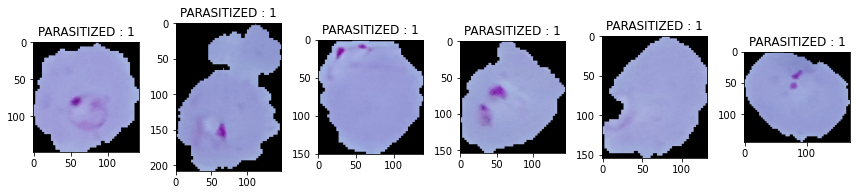

In [4]:
# for Parasitized cell_images

plt.figure(figsize = (12,12))
for i in range(6):
    plt.subplot(1, 6, i+1)
    img = cv2.imread('cell_images/cell_images/Parasitized' + "/" + Parasitized[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

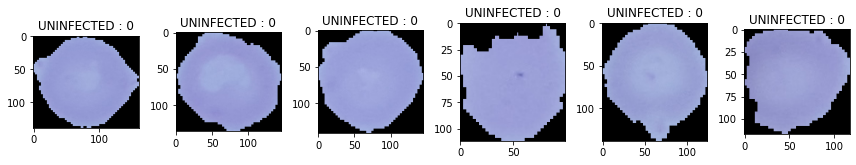

In [5]:
# for Uninfected cell_images

plt.figure(figsize = (12,12))
for i in range(6):
    plt.subplot(1, 6, i+1)
    img = cv2.imread('cell_images/cell_images/Uninfected' + "/" + Uninfected[i])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

# Dataset preparation 

The process of converting raw data into a comprehensible format is known as dataset preparation. We can't deal with raw data, thus this is a key stage in data mining. Before using machine learning or data mining methods, make sure the data is of good quality.

In [6]:
# we will Loop through the label subdirectories and collect the data in two lists, 
# one list for labels, and one list for the images inside those label folders.
labels = []
images = []

category = 0 # this is the first folder on the cell_images folder
for d in directories:
    label_dir = os.path.join("cell_images/cell_images/", d)
    # to get all the image files (all .png) in each subdirectory
    file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".png")]
    
    for f in file_names:
        img = cv2.imread(f)
        imresize = cv2.resize(img, (50, 50))
        images.append(imresize)
        labels.append(category)
            
    category += 1 # to automatically select the next in folder category to be (1) following the initial one in the subdirectory for cell_images


In [7]:
# The images and labels variables are being converted to Numpy format

images = np.array(images) # The number of dimensions is the rank of the array
images.shape

(27558, 50, 50, 3)

In [8]:
# for label 

labels = np.array(labels)
labels.shape

(27558,)

# Data Transformation


Data transformation is the process of changing the format, structure, or values of data.

In [9]:
# we will split the data into train and test by importing the train_test function from sklearn.

from sklearn.model_selection import train_test_split
# we will use test size of 20% and random state of 1234
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1234) 

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22046, 50, 50, 3)
(22046,)
(5512, 50, 50, 3)
(5512,)


In [11]:
# to preserve PC RAM, we created a function that converts the data to 32 bit data:
# this will normalize inputs from [0.0, 255.0] to end up with input in the range [0.0, 1.0]

X_train = np.array(X_train).astype('float32') # float 32 shows the conversion state of  32 bits in computer memory
X_test = np.array(X_test).astype('float32')
X_train /= 255.0    # normalizing the input
X_test /= 255.0

# then we will use one-hot encoding on the labels.
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
print(y_train.shape) #  one-hot encoding conversion confirmation

(22046, 2)


**the shape is confirmed**

In [13]:
num_classes = y_train.shape[1]
print(num_classes)

2


# Building the model.

We will be using the deep model - Convolutional Neural Network Model (CNN). CNN is mostly used for image categorization and has been popular since its inception in 1998 because to its excellent accuracy and performance.
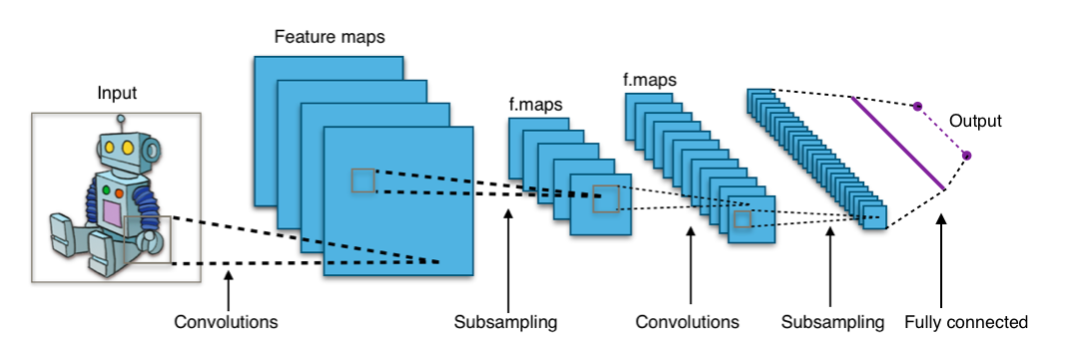
source- (Fuhad et al., 2020)
As seen in the diagram above, CNN classifies pictures by taking a piece of the image and processing it through various layers to determine what kind of image it is. Convolutional Layer, Pooling Layer, and Fully Connected Layer are three types of layers that may be created from those many layers.


In [14]:
#building the CNN model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(50, 50, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) # num_classes = 2 #Softmax classification is normally used in the output layer and also in this project’s output layer.

# we will now Compile model
epochs = 25 # this is advised to be either 25 or above 
lr = 0.01 # learning rate
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # to compile the model.
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               8667648   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

# Fitting the Model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping # importing this library makes sure we can use the early stopping function

callback = EarlyStopping(monitor='loss', patience=3)

seed = 1234
np.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, callbacks=[callback])


print(len(history.history['loss']))

Epoch 1/25
345/345 [==============================] - 158s 452ms/step - loss: 0.6504 - accuracy: 0.6709 - val_loss: 0.4349 - val_accuracy: 0.8471
Epoch 2/25
345/345 [==============================] - 154s 446ms/step - loss: 0.3399 - accuracy: 0.8711 - val_loss: 0.2342 - val_accuracy: 0.9193
Epoch 3/25
345/345 [==============================] - 160s 463ms/step - loss: 0.2461 - accuracy: 0.9119 - val_loss: 0.2132 - val_accuracy: 0.9196
Epoch 4/25
345/345 [==============================] - 157s 454ms/step - loss: 0.2062 - accuracy: 0.9278 - val_loss: 0.1785 - val_accuracy: 0.9367
Epoch 5/25
345/345 [==============================] - 158s 459ms/step - loss: 0.1799 - accuracy: 0.9364 - val_loss: 0.1685 - val_accuracy: 0.9436
Epoch 6/25
345/345 [==============================] - 151s 438ms/step - loss: 0.1596 - accuracy: 0.9471 - val_loss: 0.1563 - val_accuracy: 0.9497
Epoch 7/25
345/345 [==============================] - 164s 475ms/step - loss: 0.1311 - accuracy: 0.9575 - val_loss: 0.1533 -

# Validation and Visualization 

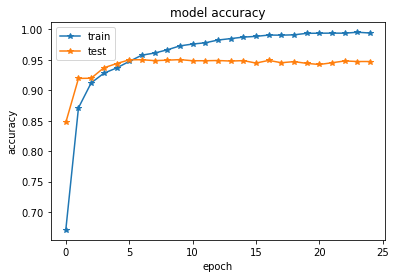

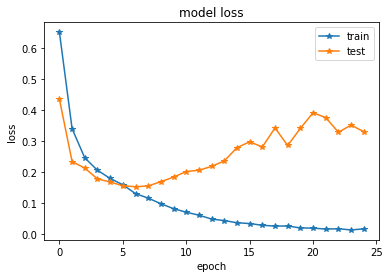

In [16]:
#   Plot data to see relationships in training and test data and the relationship for its model loss 

# summarize history for accuracy
plt.plot(history.history['accuracy'], marker = '*')
plt.plot(history.history['val_accuracy'], marker = '*')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], marker = '*')
plt.plot(history.history['val_loss'], marker = '*')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Evaluating the model

In [17]:
predict = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

173/173 [==============================] - 7s 40ms/step - loss: 0.3304 - accuracy: 0.9470
Loss:  0.330390065908432
Accuracy:  94.70247030258179


In [18]:
from sklearn.metrics import classification_report # for visualization of the classification metrics

preds = model.predict(X_test)
print(preds.shape) # this returns the one-hot encoding application 
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=directories))

(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

 Parasitized       0.95      0.94      0.95      2730
  Uninfected       0.95      0.95      0.95      2782

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



**It appears that the performance averages around 95%, which is excellent and consistent with the CNN model. Now, Let us create a confusion matrix with Sklearn and forecast the result to have a better understanding of the data performance:**

<AxesSubplot:>

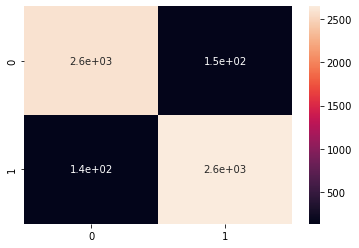

In [19]:
from sklearn.metrics import confusion_matrix # for confusion metrics
import seaborn as sns

# the Confusion Matrix from scikit learn has predicted on side, actual on top, so it's confusing. Here, we unravel it into variables and print it out without confusion:
'CONFUSION MATRIX:'
tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
'TRUE POSITIVES | FALSE NEGATIVES'
'FALSE POSITIVES | TRUE NEGATIVES'
tp, fn
fp, tn


# To Plot the Confusion Matrix:
import matplotlib.pyplot as plt
conf = confusion_matrix(y_true, preds)
sns.heatmap(conf, annot=True)

**We can get an accuracy of around 95% using the built model, with nearly equal and low False Negatives and False Positives**

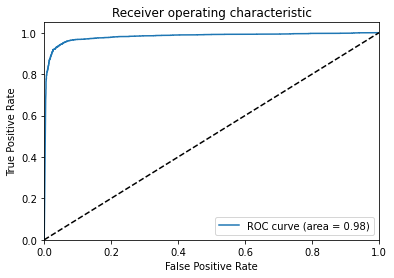

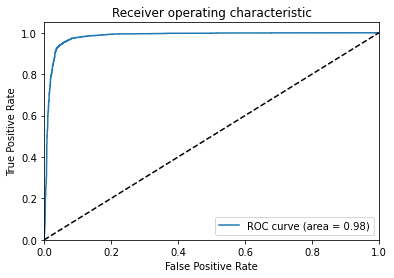

In [20]:
# let us Compute ROC curve and ROC area for each class

from sklearn.metrics import roc_curve, auc

y_score = model.predict(X_test) # for the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

## Transfer learning & fine-tuning

We will now compare our findings to the best practise way of using a highly referenced pre-trained VGG19 model and retraining that CNN model with some additional categories for our Malaria against various photos using transfer learning and fine tuning.


# Transfer Learning 

In [21]:
# Step 1: let us import the pretrained VGG19 model weights

from tensorflow.keras.applications.vgg19 import VGG19

base_model = VGG19(input_shape=(50, 50, 3), weights="imagenet", include_top=False)


In [22]:
# Step 2: Set trainable to false since we are not going to retrain the model but will use its pretrained weights instead


base_model.trainable = False

In [23]:
# Step 3: now let us Create our model
# # we will Define the layers in the new classification output layer

from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import GlobalAveragePooling2D

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
prediction = Dense((category), activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=prediction)


model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [24]:
# step 4: Train the transfer model using the same number of epochs and batch size as our built CNN model

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, callbacks=[callback])

Epoch 1/25
345/345 [==============================] - 543s 2s/step - loss: 0.4896 - accuracy: 0.7863 - val_loss: 0.3778 - val_accuracy: 0.8516
Epoch 2/25
345/345 [==============================] - 541s 2s/step - loss: 0.3414 - accuracy: 0.8676 - val_loss: 0.3317 - val_accuracy: 0.8598
Epoch 3/25
345/345 [==============================] - 518s 2s/step - loss: 0.3084 - accuracy: 0.8777 - val_loss: 0.3081 - val_accuracy: 0.8772
Epoch 4/25
345/345 [==============================] - 512s 1s/step - loss: 0.2929 - accuracy: 0.8836 - val_loss: 0.2979 - val_accuracy: 0.8826
Epoch 5/25
345/345 [==============================] - 532s 2s/step - loss: 0.2837 - accuracy: 0.8870 - val_loss: 0.2897 - val_accuracy: 0.8826
Epoch 6/25
345/345 [==============================] - 530s 2s/step - loss: 0.2768 - accuracy: 0.8896 - val_loss: 0.2841 - val_accuracy: 0.8857
Epoch 7/25
345/345 [==============================] - 550s 2s/step - loss: 0.2712 - accuracy: 0.8917 - val_loss: 0.2803 - val_accuracy: 0.8872

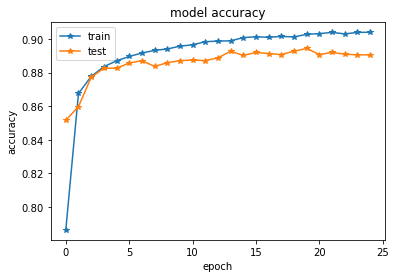

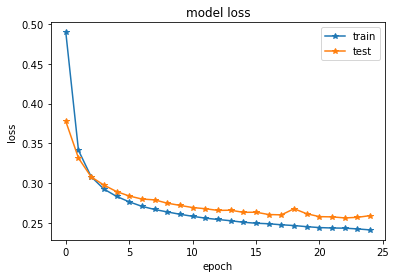

In [25]:
# step 5: Visualization 

#   Plot data to see relationships in training and test data and the relationship for its model loss 

# summarize history for accuracy
plt.plot(history.history['accuracy'], marker = '*')
plt.plot(history.history['val_accuracy'], marker = '*')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], marker = '*')
plt.plot(history.history['val_loss'], marker = '*')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [26]:
# step 6: Evaluating the model

predict = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

173/173 [==============================] - 106s 615ms/step - loss: 0.2595 - accuracy: 0.8906
Loss:  0.2595062851905823
Accuracy:  89.06023502349854


In [27]:
# step 7: visualization of the classification metrics

from sklearn.metrics import classification_report # for visualization of the classification metrics

preds = model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=directories))

173/173 [==============================] - 108s 619ms/step
(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

 Parasitized       0.92      0.85      0.89      2730
  Uninfected       0.86      0.93      0.90      2782

    accuracy                           0.89      5512
   macro avg       0.89      0.89      0.89      5512
weighted avg       0.89      0.89      0.89      5512



<AxesSubplot:>

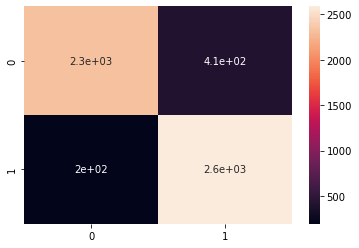

In [28]:
from sklearn.metrics import confusion_matrix # for confusion metrics
import seaborn as sns

# the Confusion Matrix from scikit learn has predicted on side, actual on top, so it's confusing. Here, we unravel it into variables and print it out without confusion:
'CONFUSION MATRIX:'
tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
'TRUE POSITIVES | FALSE NEGATIVES'
'FALSE POSITIVES | TRUE NEGATIVES'
tp, fn
fp, tn


# To Plot the Confusion Matrix:
import matplotlib.pyplot as plt
conf = confusion_matrix(y_true, preds)
sns.heatmap(conf, annot=True)

**The transfer learning has high false positve and false negative**

# Fine Tunning 

First for Val_loss

In [29]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential

In [30]:
# Step 1: we will build the model with the choice parameters we target then compile:

def build_model(hp):
    # Create the model
    model = Sequential()
    model.add(Conv2D(hp.Choice('filters', [8, 16, 32]), kernel_size=(3, 3), input_shape=(50, 50, 3), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax')) # num_classes = 2
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    

In [31]:
# Step 2: we will use RandomSearch from keras_tuner to determine the best val_loss and choose directory
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    directory='M.L',)

In [32]:
# Step 3: start the search
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 3 Complete [00h 14m 50s]
val_loss: 0.14945417642593384

Best val_loss So Far: 0.14945417642593384
Total elapsed time: 00h 35m 46s
INFO:tensorflow:Oracle triggered exit


##for val_accuracy

In [33]:
# step 1: use RandomSearch from keras_tuner to determine the best val_accuracy

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='Final',)


In [34]:
# Step 2: start the search
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 2 Complete [00h 10m 54s]
val_accuracy: 0.9424890875816345

Best val_accuracy So Far: 0.9513788223266602
Total elapsed time: 00h 26m 28s
INFO:tensorflow:Oracle triggered exit


# Conclusion

This project presents a deep learning model for malaria detection using CNN, a deep learning algorithm. We got an average validation accuracy of 95% with average validation loss of 0.3303. On transferring the model to VGG19, we were able to obtain a lower validation accuracy of 89% and validation loss of 0.2595. Also, the confusion matrix shows high false positive and false negative.
However, with the fine tuning we can achieve an overall best validation accuracy is 95.13% and the best validation loss is 0.1494.  Fine tuning gives the best validation performance.

We propose using the Transfer learning with Fine tuning approach for deep learning model for better model performance. 
Overall, we would say CNN is a very powerful model for image classification and does not require many pre-processing tasks to be done as it is included in the convolutional and pooling layers.
